In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
global_df = pd.read_csv("time_series_covid19_confirmed_global.csv") 
global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


In [7]:
global_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/12/20', '8/13/20', '8/14/20', '8/15/20', '8/16/20', '8/17/20',
       '8/18/20', '8/19/20', '8/20/20', '8/21/20'],
      dtype='object', length=217)

In [8]:
global_df.sort_values(by=[global_df.columns[-1]], ascending = False)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
242,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,...,5197411,5248958,5313252,5361165,5403213,5438325,5482416,5529824,5573847,5622540
30,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,...,3164785,3224876,3275520,3317096,3340197,3359570,3407354,3456652,3501975,3532330
143,NaN,India,20.593684,78.962880,0,0,0,0,0,0,...,2396637,2461190,2525922,2589952,2647663,2702681,2767253,2836925,2905825,2975701
208,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,...,900745,905762,910778,915808,920719,925558,930276,935066,939833,944671
224,NaN,South Africa,-30.559500,22.937500,0,0,0,0,0,0,...,568919,572865,579140,583653,587345,589886,592144,596060,599940,603338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
124,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,4,4,4,4,4,4,5,5,5,5
246,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
85,Tibet,China,31.692700,88.092400,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


We find that the top 5 countries are US, Brazil, India, Russia and South Africa

<h1> Load and Transform the Data </h1>

In [98]:
def load_data(file_name):
    df = pd.read_csv(file_name)
    df = df[df['8/21/20'] >= 603338]
    df = df.sort_values(by = ['8/21/20'], ascending = False)
    df = df.drop(columns = ['Province/State', 'Lat', 'Long', 'Country/Region'], axis = 1)
    df = df.transpose()
    df['DateTime'] = pd.to_datetime(df.index)
    df = df.set_index('DateTime')
    df.columns = ['US', 'Brazil', 'India', 'Russia', 'South Africa']
    df = df.diff()
    df.dropna(inplace=True, how="any")
    return df

,US,Brazil,India,Russia,South Africa
DateTime,,,,,
2020-01-23,0.0,0.0,0.0,0.0,0.0
2020-01-24,1.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0
2020-01-26,3.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-08-17,35112.0,19373.0,55018.0,4839.0,2541.0
2020-08-18,44091.0,47784.0,64572.0,4718.0,2258.0
2020-08-19,47408.0,49298.0,69672.0,4790.0,3916.0


US              False
Brazil          False
India           False
Russia          False
South Africa    False
dtype: bool

<AxesSubplot:xlabel='DateTime'>

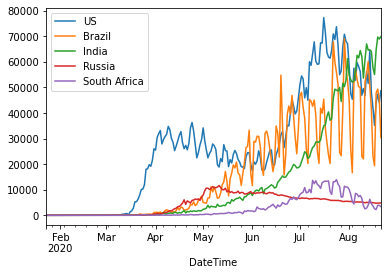

In [100]:
df = load_data("time_series_covid19_confirmed_global.csv")
display(df)
display(df.isnull().any())
df.plot.line()

<h1> Extract Seasonal Components </h1>

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult

In [109]:
def sea_decomp(df):
    new_df = df.copy()
    for column in df.columns:
        seasonal_decomp = seasonal_decompose(df[column], model="additive")
        new_df[column] = seasonal_decomp.seasonal
    return new_df

In [111]:
df_seasonal = sea_decomp(df)
display(df_seasonal)
display(df_seasonal.isnull().any())

,US,Brazil,India,Russia,South Africa
DateTime,,,,,
2020-01-23,2431.761670,3380.626554,441.179428,-54.886371,322.986535
2020-01-24,3446.796153,3457.641332,621.396176,23.689984,362.434811
2020-01-25,578.564626,586.665963,594.066127,55.034811,391.346141
2020-01-26,-2728.454422,-6031.950950,46.655454,137.908703,76.880131
2020-01-27,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
...,...,...,...,...,...
2020-08-17,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
2020-08-18,-719.521088,1549.577621,-544.749308,-28.929392,-662.877011
2020-08-19,284.707483,4202.114239,76.125240,-134.659770,16.725452


US              False
Brazil          False
India           False
Russia          False
South Africa    False
dtype: bool

Text(0, 0.5, 'South Africa')

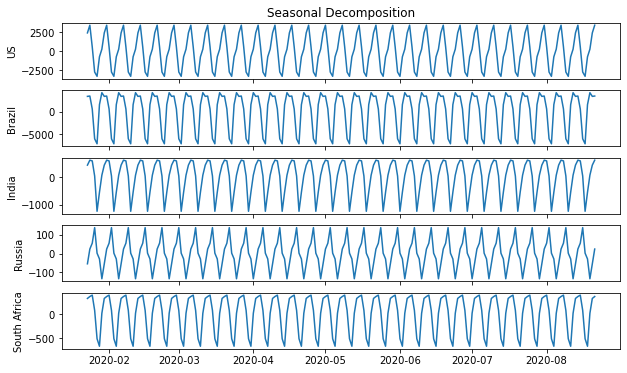

In [119]:
fig, axes = plt.subplots(5, 1, figsize=(10, 6), sharex=True)

axes[0].set_title("Seasonal Decomposition")
axes[0].plot(df_seasonal.US)
axes[0].set_ylabel("US")

axes[1].plot(df_seasonal.Brazil)
axes[1].set_ylabel("Brazil")

axes[2].plot(df_seasonal.India)
axes[2].set_ylabel("India") 

axes[3].plot(df_seasonal.Russia)
axes[3].set_ylabel("Russia")

axes[4].plot(df_seasonal['South Africa'])
axes[4].set_ylabel("South Africa")

<h1> Time Series Similarities </h1>

<h2> Euclidean Distance </h2>

In [131]:
def calc_euclidean_dist(df):
    # initialize matrix
    dist_matrix = []
    for column in df.columns:
        dist_matrix.append([0] * len(df.columns))
    
    # calculate euclidean distance between two pandas series
    def cal_dist(A, B):
        if len(A) != len(B):
            return None
        
        total = 0
        for i in range(len(A)):
            total += (A[i] - B[i])**2
        return np.sqrt(total)
    
    # Pair any two series of dataframe and store result into matrix
    # Can be improved by making j in range(0, len(df.columns)), and matrix += matrix.transpose()
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            dist_matrix[i][j] = cal_dist(df[df.columns[i]], df[df.columns[j]])

    return pd.DataFrame(dist_matrix, index=df.columns, columns=df.columns)

In [133]:
df_euclidean_dist = calc_euclidean_dist(df)
df_euclidean_dist

,US,Brazil,India,Russia,South Africa
US,0.000000,233760.757213,272344.138927,433638.331574,436238.175972
Brazil,233760.757213,0.000000,178779.663740,306032.283923,304919.698741
India,272344.138927,178779.663740,0.000000,316862.767630,303936.538967
Russia,433638.331574,306032.283923,316862.767630,0.000000,67392.593681
South Africa,436238.175972,304919.698741,303936.538967,67392.593681,0.000000


In [134]:
df_seasonal_euclidean_dist = calc_euclidean_dist(df_seasonal)
df_seasonal_euclidean_dist

,US,Brazil,India,Russia,South Africa
US,0.000000,37616.752035,27032.887714,33986.305519,30084.544171
Brazil,37616.752035,0.000000,57583.437987,63663.896821,60839.376478
India,27032.887714,57583.437987,0.000000,9102.412727,4490.020448
Russia,33986.305519,63663.896821,9102.412727,0.000000,5658.222387
South Africa,30084.544171,60839.376478,4490.020448,5658.222387,0.000000


<h2> Cosine Similarity </h2>

In [144]:
def calc_cos_sim(df):
    # initialize matrix
    dist_matrix = []
    for column in df.columns:
        dist_matrix.append([0] * len(df.columns))
    
    # calculate euclidean distance between two pandas series
    def cal_dist(A, B):
        if len(A) != len(B):
            return None    
        return np.dot(A, B) / (np.sqrt(A.dot(A)) * np.sqrt(B.dot(B)))
    
    # Pair any two series of dataframe and store result into matrix
    # Can be improved by making j in range(0, len(df.columns)), and matrix += matrix.transpose(), then divide 2 on diagonal
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            dist_matrix[i][j] = cal_dist(df[df.columns[i]], df[df.columns[j]])

    return pd.DataFrame(dist_matrix, index=df.columns, columns=df.columns)

In [145]:
df_cos_sim = calc_cos_sim(df)
df_cos_sim

,US,Brazil,India,Russia,South Africa
US,1.000000,0.898664,0.847160,0.804740,0.884909
Brazil,0.898664,1.000000,0.878452,0.763523,0.871214
India,0.847160,0.878452,1.000000,0.590388,0.809944
Russia,0.804740,0.763523,0.590388,1.000000,0.638246
South Africa,0.884909,0.871214,0.809944,0.638246,1.000000


In [146]:
df_seasonal_cos_sim = calc_cos_sim(df_seasonal)
df_seasonal_cos_sim

,US,Brazil,India,Russia,South Africa
US,1.000000,0.868859,0.783851,-0.325065,0.664261
Brazil,0.868859,1.000000,0.632741,-0.629987,0.403198
India,0.783851,0.632741,1.000000,0.092292,0.917529
Russia,-0.325065,-0.629987,0.092292,1.000000,0.174437
South Africa,0.664261,0.403198,0.917529,0.174437,1.000000


<h1> Dynamic Time Warping (DTW) Cost </h1>

In [175]:
def calc_pairwise_dtw_cost(A, B, ret_matrix=True, take_sqrt=False):
    # initialize dp matrix
    dp = np.zeros((len(B), len(A)))
    
    # distance function
    def dist(A, B):
        if take_sqrt:
            return np.sqrt((A-B)**2)
        else:
            return (A-B)**2
    
    # iterate through the series
    for i in range(len(B)):
        for j in range(len(A)):
            if i == 0:
                dp[i][j] = dist(A[i], B[j]) + dp[i][j-1]
            else:
                dp[i][j] = dist(A[i], B[j]) + min(dp[i-1][j], dp[i-1][j-1], dp[i][j-1])
    
    # return values according to ret_matrix
    if ret_matrix:
        return dp
    else:
        return dp[len(B)-1][len(A)-1]

In [176]:
calc_pairwise_dtw_cost(df.US, df.Brazil, False)

9575974028.0

In [178]:
def calc_dtw_cost(df, take_sqrt=False):
    # initialize matrix
    dist_matrix = []
    for column in df.columns:
        dist_matrix.append([0] * len(df.columns))
    
    # calculate euclidean distance between two pandas series
    # use calc_pairwise_dtw_cost for distance function
    
    # Pair any two series of dataframe and store result into matrix
    # Can be improved by making j in range(0, len(df.columns)), and matrix += matrix.transpose()
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            dist_matrix[i][j] = calc_pairwise_dtw_cost(df[df.columns[i]], df[df.columns[j]], False, take_sqrt)

    return pd.DataFrame(dist_matrix, index=df.columns, columns=df.columns)

In [179]:
df_dtw_cost = calc_dtw_cost(df)
df_dtw_cost

,US,Brazil,India,Russia,South Africa
US,0.000000e+00,9.575974e+09,5.187397e+09,1.740747e+11,1.395159e+11
Brazil,9.575970e+09,0.000000e+00,1.430988e+10,5.535404e+10,6.542703e+10
India,5.187266e+09,1.430988e+10,0.000000e+00,9.927626e+10,8.728950e+10
Russia,1.740747e+11,8.361811e+10,9.927626e+10,0.000000e+00,1.638671e+08
South Africa,1.395159e+11,6.542700e+10,8.728948e+10,1.638078e+08,0.000000e+00


In [183]:
df_seasonal_dtw_cost = calc_dtw_cost(df_seasonal)
df_seasonal_dtw_cost.apply(np.sqrt)

,US,Brazil,India,Russia,South Africa
US,0.000000,31864.122920,10544.756808,5999.324175,7973.613029
Brazil,31878.178988,0.000000,15636.846574,14145.940382,14494.070051
India,23551.410751,53391.172272,0.000000,1761.681847,4463.425362
Russia,32294.007403,61847.458962,7663.629305,0.000000,4232.544436
South Africa,28007.658308,57137.688333,4461.443605,1267.299523,0.000000


In [184]:
display(df_seasonal_euclidean_dist)
display(df_seasonal_cos_sim)

,US,Brazil,India,Russia,South Africa
US,0.000000,37616.752035,27032.887714,33986.305519,30084.544171
Brazil,37616.752035,0.000000,57583.437987,63663.896821,60839.376478
India,27032.887714,57583.437987,0.000000,9102.412727,4490.020448
Russia,33986.305519,63663.896821,9102.412727,0.000000,5658.222387
South Africa,30084.544171,60839.376478,4490.020448,5658.222387,0.000000


,US,Brazil,India,Russia,South Africa
US,1.000000,0.868859,0.783851,-0.325065,0.664261
Brazil,0.868859,1.000000,0.632741,-0.629987,0.403198
India,0.783851,0.632741,1.000000,0.092292,0.917529
Russia,-0.325065,-0.629987,0.092292,1.000000,0.174437
South Africa,0.664261,0.403198,0.917529,0.174437,1.000000


We find that the matrixes of Euclidean distance and DTW are very similar, meaning they are telling the same story.

However, we find that the matrix of Cosine Similarity is quite different, for example, US and Brazil is quite similar in cosine similarity while the euclidean distance is quite large. This might be due to US's 'projection' on Brazil is very similar to Brazil, while they are quite different.